<a href="https://colab.research.google.com/github/Vamsikrishna1804/INFO-5502/blob/main/Assignment4_VamsiKrishnaBharghavaMuktinutalapati_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all necessary Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns



In [ ]:
#Reading the CSV File
df=pd.read_csv('multipleChoiceResponses.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,Q8,Q9,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q11_OTHER_TEXT,Q12_MULTIPLE_CHOICE,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,...,Q46,Q47_Part_1,Q47_Part_2,Q47_Part_3,Q47_Part_4,Q47_Part_5,Q47_Part_6,Q47_Part_7,Q47_Part_8,Q47_Part_9,Q47_Part_10,Q47_Part_11,Q47_Part_12,Q47_Part_13,Q47_Part_14,Q47_Part_15,Q47_Part_16,Q48,Q49_Part_1,Q49_Part_2,Q49_Part_3,Q49_Part_4,Q49_Part_5,Q49_Part_6,Q49_Part_7,Q49_Part_8,Q49_Part_9,Q49_Part_10,Q49_Part_11,Q49_Part_12,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,...,Approximately what percent of your data projec...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,"Do you consider ML models to be ""black boxes"" ...",What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and method

In [ ]:
#Filtering the required Fields from Dataframe
df=df[['Q1','Q9']]
df

,Q1,Q9
0,What is your gender? - Selected Choice,What is your current yearly compensation (appr...
1,Female,NaN
2,Male,"10-20,000"
3,Female,"0-10,000"
4,Male,NaN
...,...,...
23855,Male,"250-300,000"
23856,Female,NaN
23857,Male,"10-20,000"
23858,Male,NaN


In [ ]:
#Data cleaning and dropping the null values
df=df.dropna()
df=df.drop(0)
df.isnull().sum(axis=0)
df

,Q1,Q9
2,Male,"10-20,000"
3,Female,"0-10,000"
5,Male,"0-10,000"
6,Male,I do not wish to disclose my approximate yearl...
7,Male,"10-20,000"
...,...,...
23848,Male,I do not wish to disclose my approximate yearl...
23850,Female,I do not wish to disclose my approximate yearl...
23854,Male,"10-20,000"
23855,Male,"250-300,000"


In [ ]:
#Data cleaning and removing unnecessary text from the selected fields
df=df[df["Q9"]!="I do not wish to disclose my approximate yearly compensation"]
df=df[df["Q1"]!="Prefer not to say"]


In [ ]:
#Selected the upper limit values from Q9 field to perform sorting
singleValueList=[]
for x in df['Q9']:
  try:
    singleValueList.append(x.split('-')[1].replace(',',''))
  except IndexError:
    singleValueList.append(x.split('+')[0].replace(',',''))

Question 1:

In [ ]:
#Sorting the salary values to calculate Median

singleValueList=[*map(int, singleValueList)]
df['SingleValued']=singleValueList
sorted_df=df.sort_values(by=['SingleValued'])
sorted_df_male=sorted_df.loc[sorted_df['Q1']=='Male']
sorted_df_female=sorted_df.loc[sorted_df['Q1']=='Female']
medianvalue_Males=int(len(sorted_df_male["Q9"])/2)+1
medianvalue_Females=int(len(sorted_df_female["Q9"])/2)+1
print("median salary of males: ",sorted_df_male.iloc[medianvalue_Males,:]['Q9'])
print("median salary of Females: ",sorted_df_female.iloc[medianvalue_Females,:]['Q9'])

median salary of males:  30-40,000
median salary of Females:  20-30,000


Question 2:


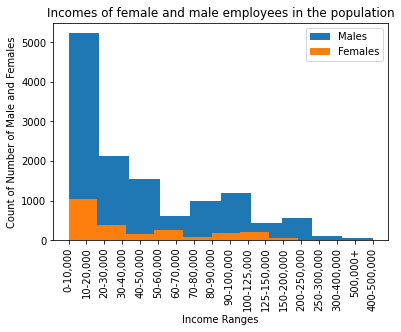

In [ ]:
#Plotting overlaid Graph

plt.hist(sorted_df_male["Q9"],label="Males")
plt.hist(sorted_df_female["Q9"],label="Females")
plt.xlabel("Income Ranges")
plt.ylabel("Count of Number of Male and Females")
plt.title("Incomes of female and male employees in the population")
plt.xticks(rotation=90)
plt.legend()

Histograms of Male and Female incomes 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

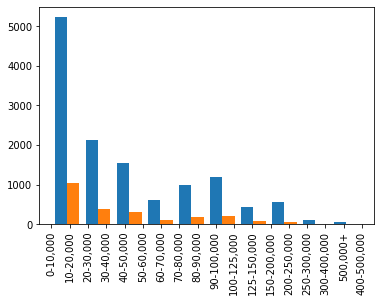

In [ ]:
plt.hist([sorted_df_male["Q9"],sorted_df_female["Q9"]] ,label="Males")
plt.xticks(rotation=90)

In [ ]:
df["Q9"]=df["Q9"].replace(['10-20,000','0-10,000','20-30,000','125-150,000','30-40,000','50-60,000',
'100-125,000','90-100,000' ,'70-80,000','80-90,000','60-70,000','400-500,000','40-50,000',
'150-200,000','300-400,000','200-250,000','500,000+','250-300,000'],[15000,5000,25000,145000,
35000,55000,120000,95000,75000,85000,65000,495000,45000,195000,395000,245000,500000,295000])
df=df[df["Q1"]!='Prefer to self-describe']
df

,Q1,Q9,SingleValued
2,Male,15000,20000
3,Female,5000,10000
5,Male,5000,10000
7,Male,15000,20000
8,Male,5000,10000
...,...,...,...
23844,Male,95000,100000
23845,Male,5000,10000
23854,Male,15000,20000
23855,Male,295000,300000


In [ ]:
#Randomly selecting 500 records from the population
random_500_samples=df.sample(500)
random_500_samples

,Q1,Q9,SingleValued
10989,Male,75000,80000
4523,Male,85000,90000
4203,Male,95000,100000
102,Female,5000,10000
19675,Male,35000,40000
...,...,...,...
10451,Female,5000,10000
22010,Male,75000,80000
630,Male,45000,50000
4256,Male,295000,300000


In [ ]:
#count of randomly selected records in aspects of gender
random_500_samples.groupby('Q1').count()

,Q9,SingleValued
Q1,,
Female,70,70
Male,430,430


In [ ]:
# Calculation of Median Value of Male incomes from the random 500 sample
male_sample=random_500_samples.loc[random_500_samples['Q1']=='Male']
print('Median Income of Male Sample is {}'.format(male_sample['Q9'].median()))

Median Income of Male Sample is 35000.0


In [ ]:
# Calculation of Median Value of Female incomes from the random 500 sample
female_sample=random_500_samples.loc[random_500_samples['Q1']=='Female']
print('Median Income of female Sample is {}'.format(female_sample['Q9'].median()))

Median Income of female Sample is 30000.0


In [ ]:
# test statistic and probability value
from scipy.stats import ttest_1samp
df["Q9"].mean()
salaryMean = df["Q9"].mean()
tTestValue,pValue = ttest_1samp(df["Q9"],salaryMean)
tTestValue,pValue

(0.0, 1.0)

In [ ]:
# test statistic and probability values for random sample
import scipy.stats as stats
stats.ttest_1samp(a=random_500_samples["Q9"],popmean=random_500_samples["Q9"].mean())

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [ ]:
#median value of males for sample
m=male_sample["SingleValued"].median()
m

40000.0

In [ ]:
#median value of females for sample
f=female_sample["SingleValued"].median()
f

35000.0

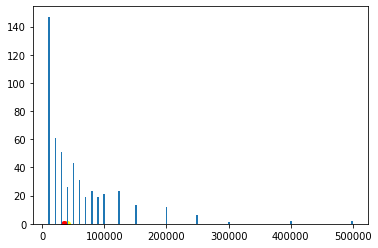

In [ ]:
#Histogram plot for males median value and females median value with red and yellow dots
plt.hist(random_500_samples["SingleValued"],bins=200)
plt.xticks()
plt.scatter(m,0,color="yellow")
plt.scatter(f,0,color="Red")
plt.show()


In [ ]:
#Difference values of Male Median and Female Median Value
males1=random_500_samples[random_500_samples["Q1"]=="Male"]
females1=random_500_samples[random_500_samples["Q1"]=="Female"]
males1["SingleValued"].median()
females1["SingleValued"].median()
#males1["SingleValued"].median()
diff_male_female_salary=(males1["SingleValued"].median())-(females1["SingleValued"].median())
diff_male_female_salary

10000.0

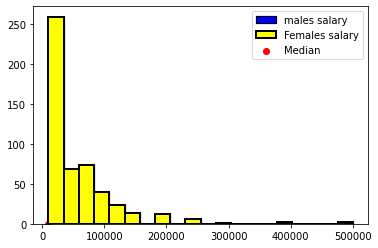

In [ ]:
#Histogram plot with difference of Males Median and Females Median(Red Dot)
plt.hist(random_500_samples["SingleValued"],bins=20,alpha=1.0,edgecolor='black',color='blue', linewidth=1.2,label="males salary") # PLot histogram for 500 samples of Median salries of Male and Female 
plt.hist(random_500_samples["SingleValued"],bins=20,alpha=1.0,edgecolor='black',color='yellow', linewidth=2,label="Females salary") # PLot histogram for 500 samples of Median salries of Male and Female 

plt.scatter(diff_male_female_salary,0,color='red',label='Median') # Plot dot for Median differnce of male and female
plt.legend()

In [ ]:
#Producing 5000 samples using Bootstrap
np.random.seed(500)
sample_bootstrap_mean=[]
for i in range(5000):
  sample=np.random.choice(df['Q9'],len(df['Q9']))
  sample_bootstrap_mean.append(sample.mean())
print(sample_bootstrap_mean)
print(len(sample_bootstrap_mean))
#print(len(sample))
#print(len(df['Q9']))
#print(sample)

[51869.34277843369, 52581.98871835235, 52105.79824216188, 51315.75495211859, 52060.86842450479, 52218.28676374131, 51480.06034369671, 52213.039485766756, 52067.09956709957, 51056.670602125145, 51718.48353666536, 51909.025318116226, 52503.607503607505, 51601.40364685819, 51789.32178932179, 51726.35445362718, 51846.71389216844, 52375.377148104424, 52264.528400892035, 51190.148235602785, 52170.07739735013, 52156.63124754034, 51382.3297914207, 52069.72320608684, 52885.01902138266, 52948.642266824085, 51155.385019021385, 51268.201495474226, 51556.4738292011, 52641.67650531287, 51896.56303292667, 52842.05693296602, 51897.874852420304, 52040.86317722681, 51051.75127902401, 52109.405745769385, 51889.020070838254, 51743.40810704447, 51420.044601862784, 52196.313787222876, 52210.415846779484, 52309.78617342254, 51427.5875639512, 51468.58192312738, 51458.41532205169, 51895.25121343303, 51887.38029647121, 51907.71349862259, 52388.167388167385, 51803.09589400498, 51942.8046700774, 52041.84704184704

(array([   8.,   74.,  333.,  930., 1432., 1283.,  656.,  233.,   40.,
          11.]),
 array([51836.24454148, 52519.75982533, 53203.27510917, 53886.79039301,
        54570.30567686, 55253.8209607 , 55937.33624454, 56620.85152838,
        57304.36681223, 57987.88209607, 58671.39737991]),
 <a list of 10 Patch objects>)

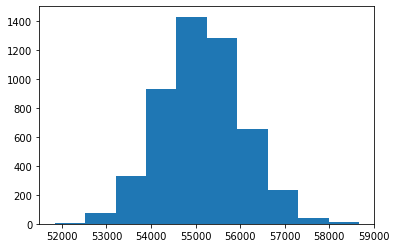

In [ ]:
#Histogram of the Test Statistic of Bootstrap samples
plt.hist(sample_bootstrap_mean)

In [ ]:
ttest,pval = ttest_1samp(df["Q9"],np.mean(sample_bootstrap_mean)) 
ttest,pval

(0.008465008000035695, 0.9932463502283844)

In [ ]:
#Lower bound and Upper Bound Values
import scipy.stats as st
print(st.norm.interval(alpha=0.95, loc=np.mean(sample_bootstrap_mean), scale=st.sem(sample_bootstrap_mean)))
print(st.norm.interval(alpha=0.05, loc=np.mean(sample_bootstrap_mean), scale=st.sem(sample_bootstrap_mean)))

(55109.70932298051, 55160.56447614611)
(55134.32337369702, 55135.9504254296)


In [ ]:
# standard deviation of data
Xstd = np.std(sample_bootstrap_mean) 
Xstd

917.2726581485368

In [ ]:
#Calculation of Confidence Interval for 95%
from scipy.stats import norm
Z_95 = norm.ppf(0.975)
Z_5 = norm.ppf(0.025)
Z_95,Z_5

(1.959963984540054, -1.9599639845400545)